# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns ={'Genre' : 'Gender'}, inplace =True)

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking Outliers

<Axes: >

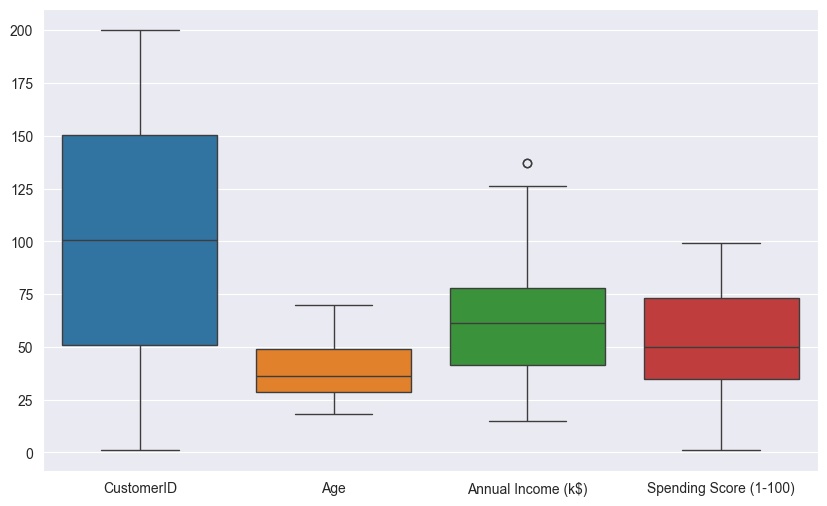

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df)

## Data Visualization

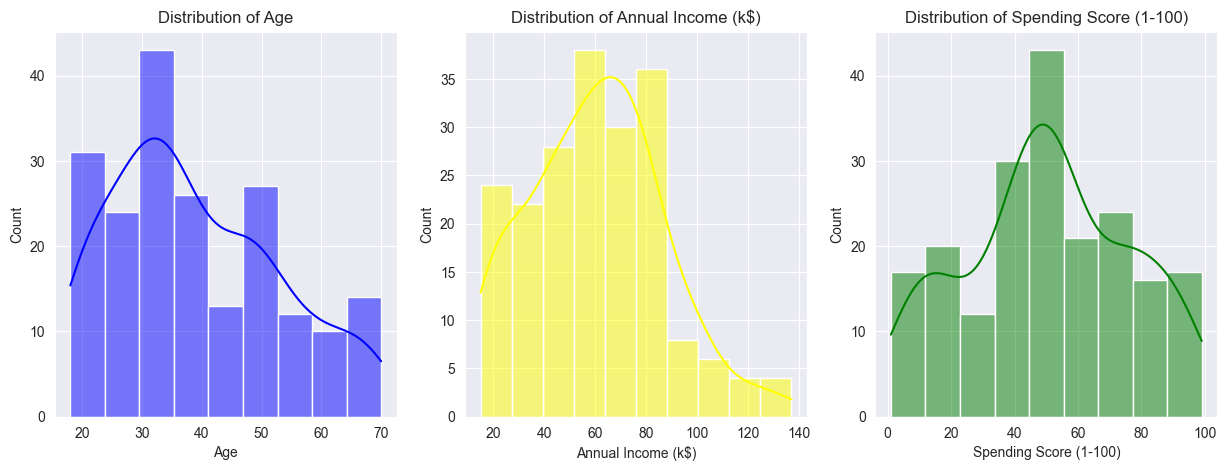

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde= True, color='blue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(data=df['Annual Income (k$)'], kde= True, color='yellow')
plt.title('Distribution of Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.histplot(data=df['Spending Score (1-100)'], kde= True, color='green')
plt.title('Distribution of Spending Score (1-100)')

plt.show()

C:\Users\kubra\AppData\Local\Temp\ipykernel_20616\2951141841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x='Gender', palette='Set2')


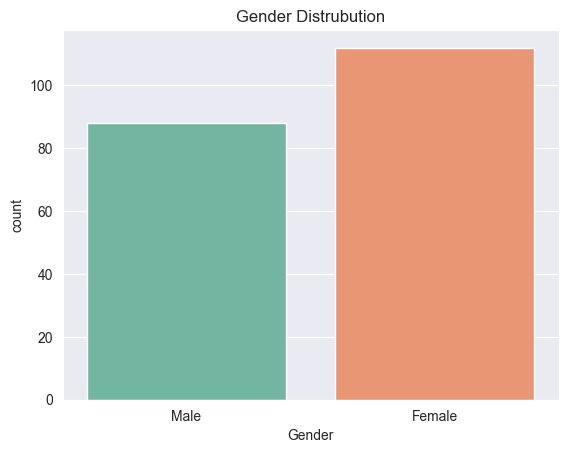

In [12]:
sns.countplot(data = df , x='Gender', palette='Set2')
plt.title('Gender Distrubution')
plt.show()

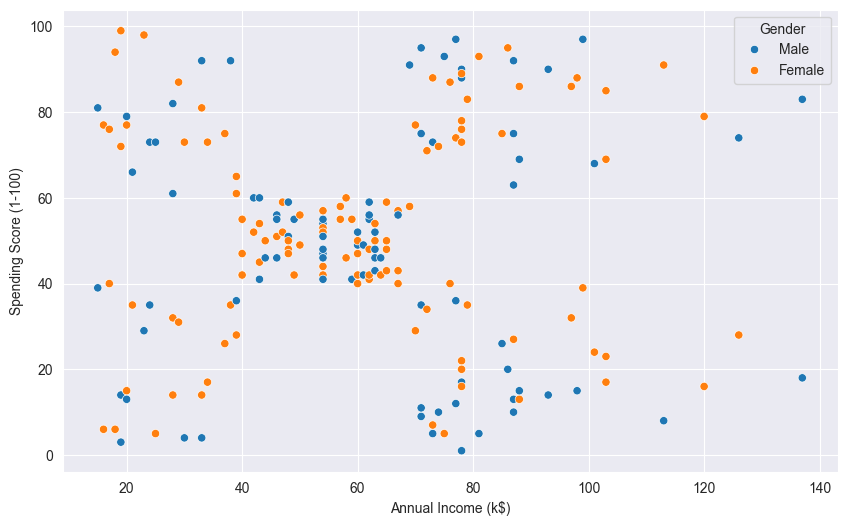

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)', hue ='Gender')
plt.show()

## Data Preprocessing with StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,3:]
scaled_data =scaler.fit_transform(X)

In [15]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
scaled_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Elbow Method

In [17]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[400.0,
 274.0906128402975,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 57.381747460227864,
 47.338486736388234,
 42.425645549119665,
 32.813636941057766,
 29.618329582146515]

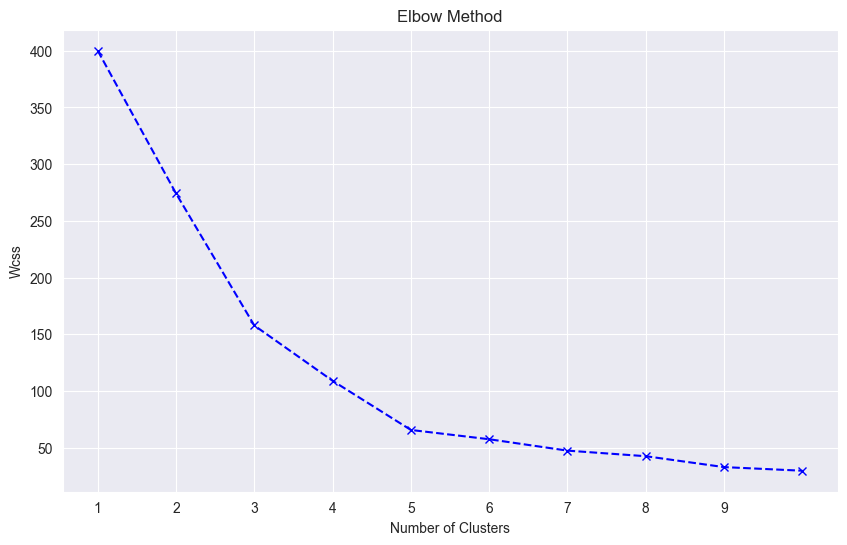

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker= 'x', linestyle= 'dashed', c= 'Blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.xticks(np.arange(1, 10, 1))
plt.grid(True)
plt.show()

# KMeans Clustering

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
df['predict'] = kmeans.fit_predict(scaled_data)

In [21]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [22]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


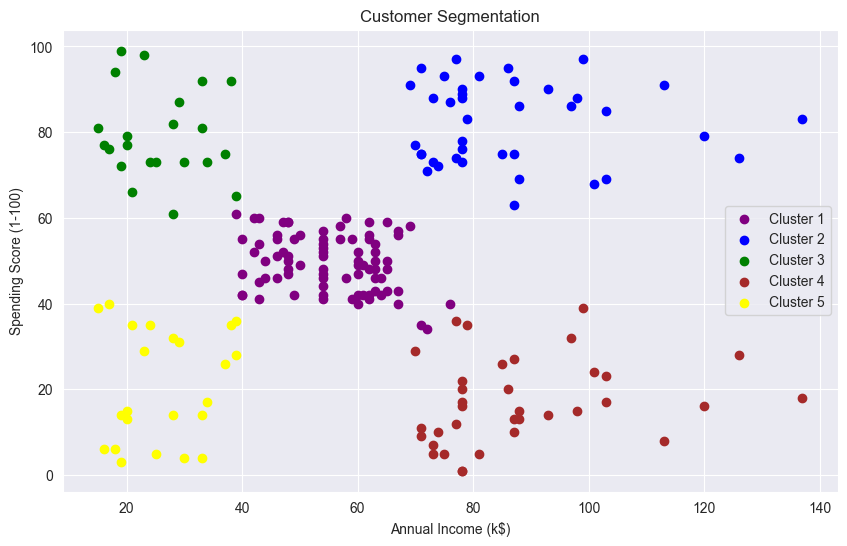

In [23]:
plt.figure(figsize=(10,6))
colors = [ 'purple', 'blue', 'green', 'brown', 'yellow']
for i in range(5):
    plt.scatter(df['Annual Income (k$)'][df['predict'] == i], df['Spending Score (1-100)'][df['predict'] == i], color = colors[i],
                label = f'Cluster {i+1}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()